In [2]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from scipy.stats import skewnorm
np.random.seed(seed=1)
size=800

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,0.582,0.340,-0.069,53.617,0.124,43.249,43.257,3,15
1,2.150,1.181,-0.127,1.214,0.667,38.776,43.122,0,16
2,-1.396,1.592,-0.288,4.921,0.014,38.944,34.144,0,10


In [4]:
df['NormalStd_1']= np.random.normal(loc=0, scale=1, size=size)
df['NormalStd_5']= np.random.normal(loc=0, scale=5, size=size)
df['NormalStd_10']= np.random.normal(loc=0, scale=10, size=size)

In [5]:
df.var()

Normal               4.137334
Positive Skewed      0.339450
Negative Skewed      0.403699
Exponential        366.345112
Uniform              0.085860
Bimodal            236.540089
Multimodal         979.336972
Poisson              1.047295
Discrete             9.293678
NormalStd_1          0.983686
NormalStd_5         23.011071
NormalStd_10       100.622525
dtype: float64

In [6]:
np.sqrt(df.var())

Normal              2.034044
Positive Skewed     0.582623
Negative Skewed     0.635373
Exponential        19.140144
Uniform             0.293018
Bimodal            15.379860
Multimodal         31.294360
Poisson             1.023374
Discrete            3.048553
NormalStd_1         0.991809
NormalStd_5         4.796986
NormalStd_10       10.031078
dtype: float64

In [7]:
df.std()

Normal              2.034044
Positive Skewed     0.582623
Negative Skewed     0.635373
Exponential        19.140144
Uniform             0.293018
Bimodal            15.379860
Multimodal         31.294360
Poisson             1.023374
Discrete            3.048553
NormalStd_1         0.991809
NormalStd_5         4.796986
NormalStd_10       10.031078
dtype: float64

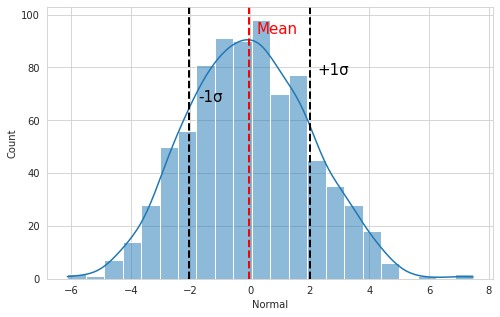

In [8]:
col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

plt.axvline(df[col].mean() + df[col].std(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='k')

plt.axvline(df[col].mean() - df[col].std(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=-df[col].mean() - df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.65, s='-1σ', fontsize=15, c='k')

plt.show()

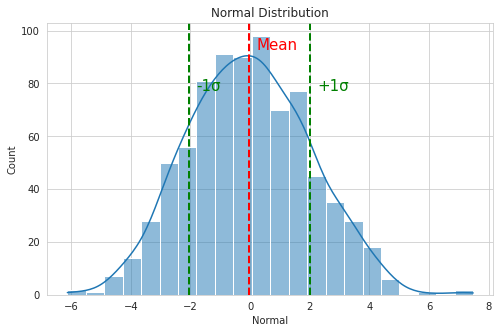

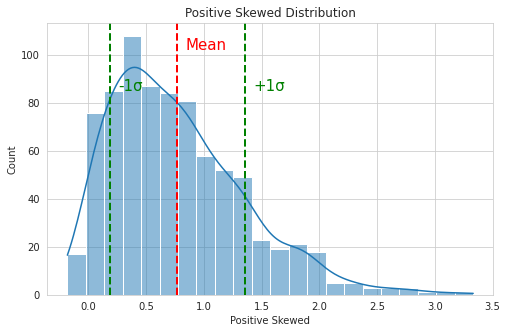

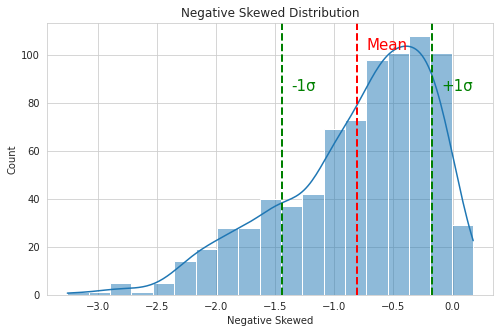

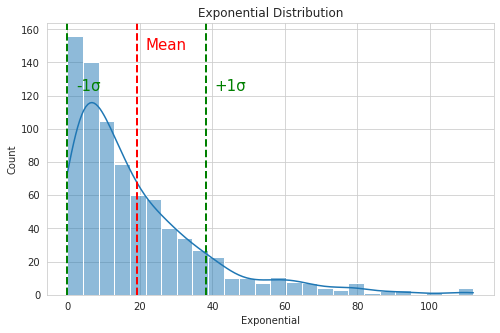

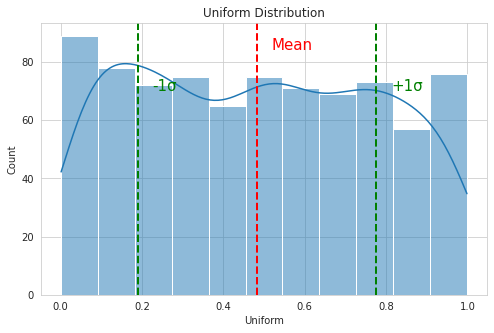

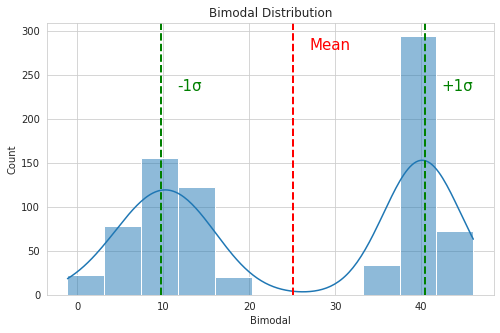

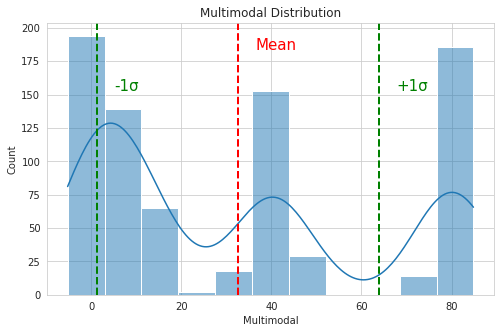

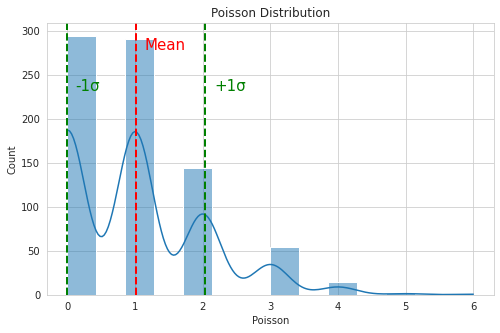

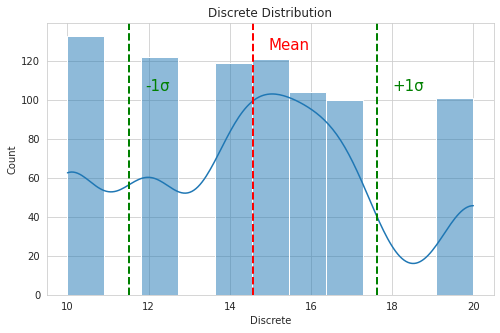

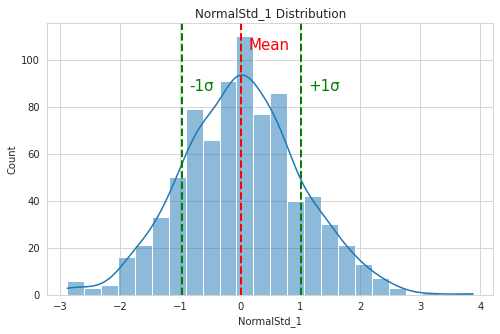

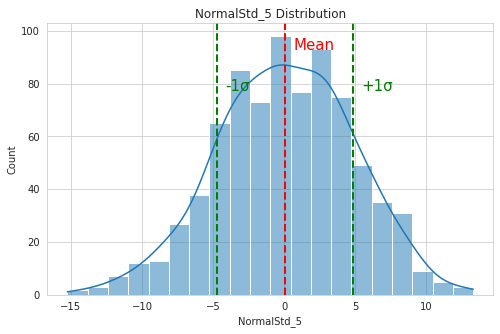

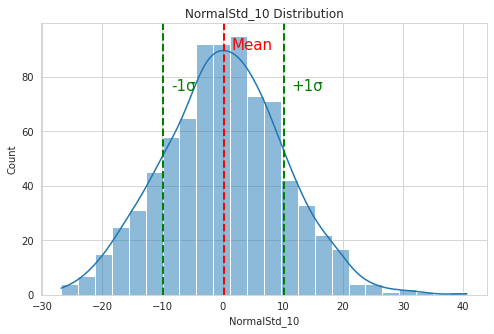

In [9]:
for col in df.columns:

  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].mean() + df[col].std(), color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='g')

  plt.axvline(df[col].mean() - df[col].std(), color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() - df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='-1σ', fontsize=15, c='g')

plt.show()

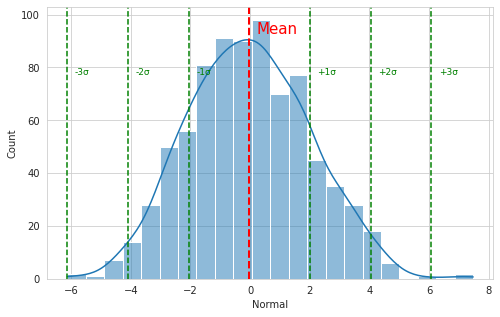

In [10]:
col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

for num in[1,2,3]:
  plt.axvline(df[col].mean() + num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].mean() + num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'+{num}σ', fontsize=9, c='g')

  plt.axvline(df[col].mean() - num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].mean() - num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'-{num}σ', fontsize=9, c='g')


plt.show()

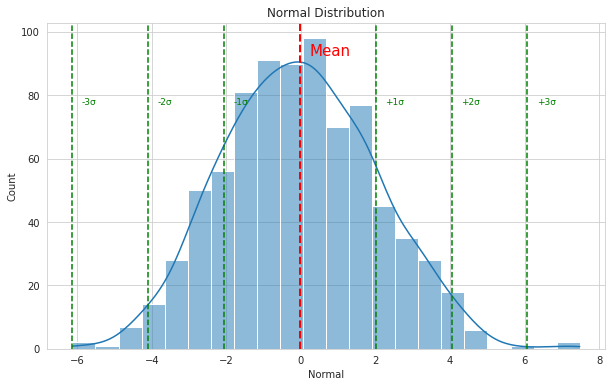

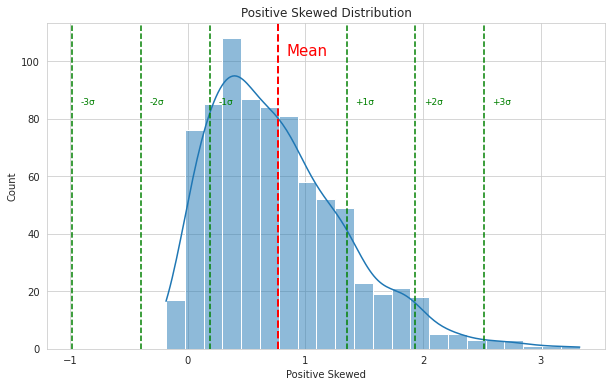

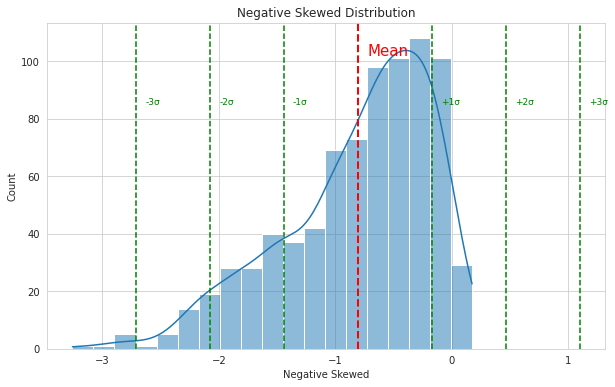

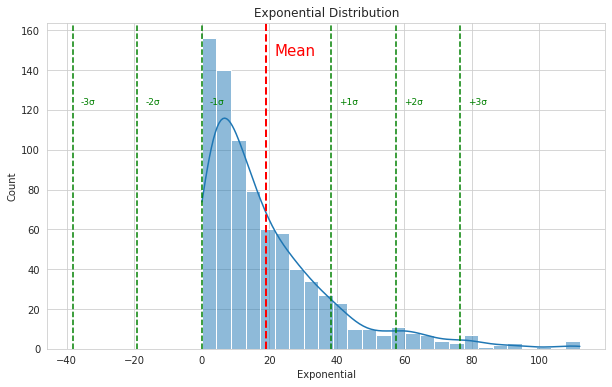

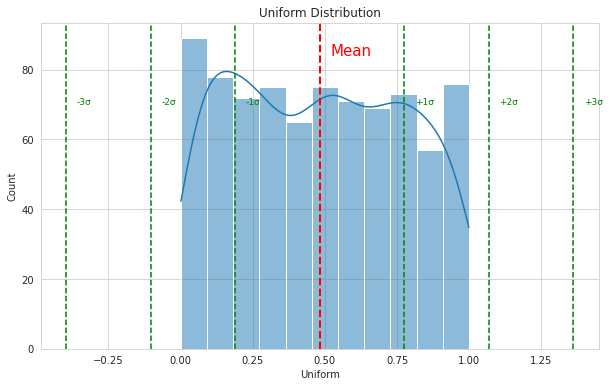

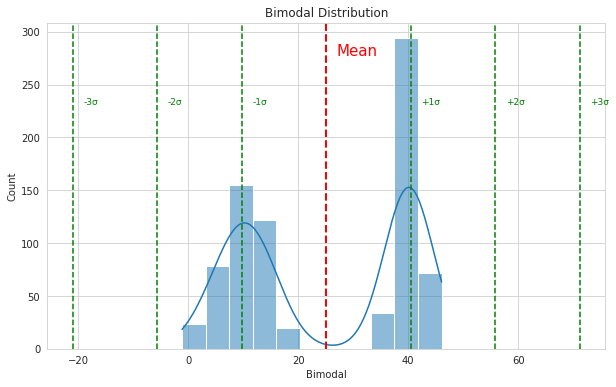

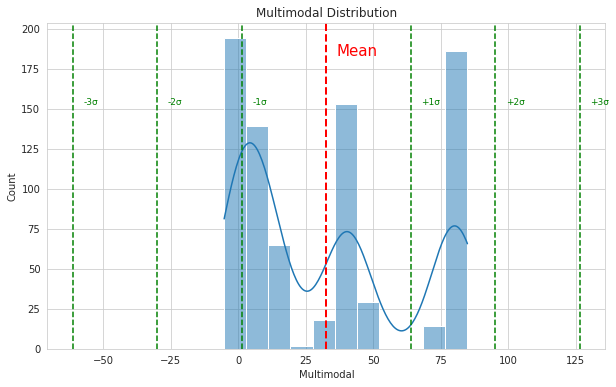

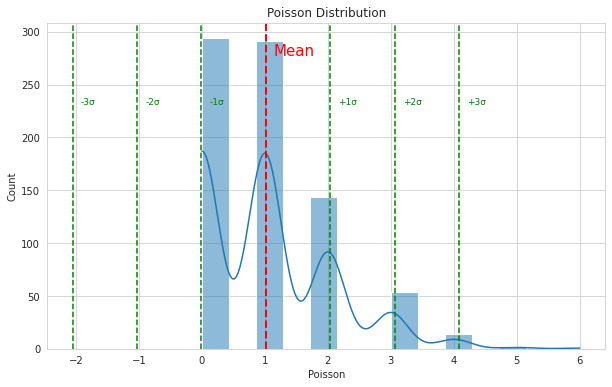

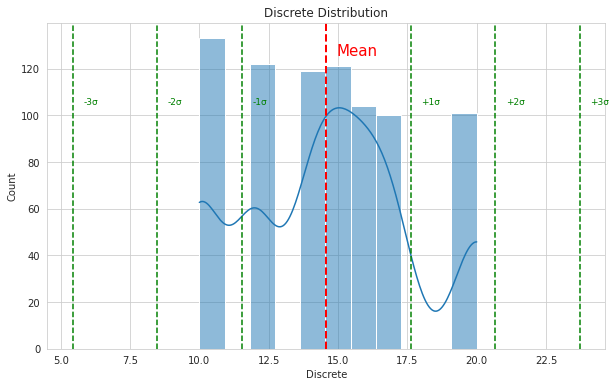

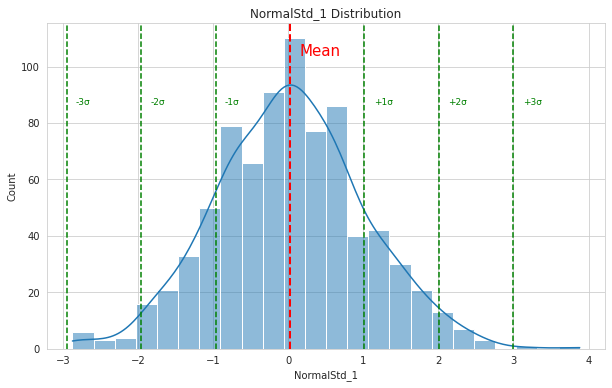

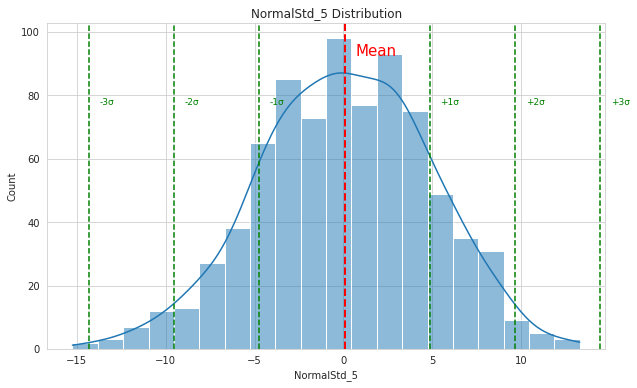

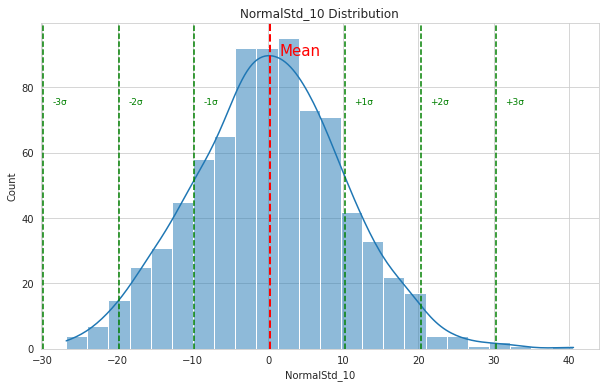

In [11]:
for col in df.columns:

  fig, axes = plt.subplots(figsize=(10,6))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"{col} Distribution")
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  for num in[1,2,3]:
    plt.axvline(df[col].mean() + num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].mean() + num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'+{num}σ', fontsize=9, c='g')

    plt.axvline(df[col].mean() - num * df[col].std(), color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].mean() - num * df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s=f'-{num}σ', fontsize=9, c='g')


  plt.show()
  print("\n")

In [12]:
df.skew()

Normal             0.143826
Positive Skewed    0.984182
Negative Skewed   -0.891811
Exponential        1.863707
Uniform            0.067813
Bimodal           -0.080381
Multimodal         0.500373
Poisson            1.021067
Discrete           0.135004
NormalStd_1        0.073531
NormalStd_5       -0.127582
NormalStd_10       0.114864
dtype: float64

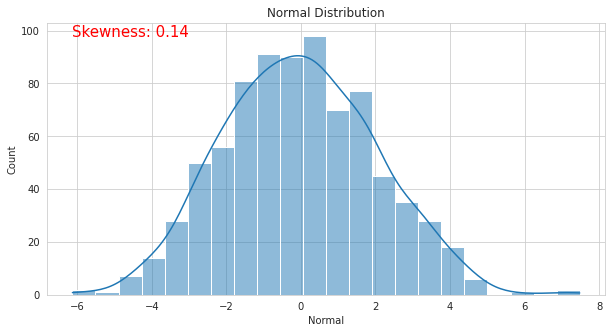

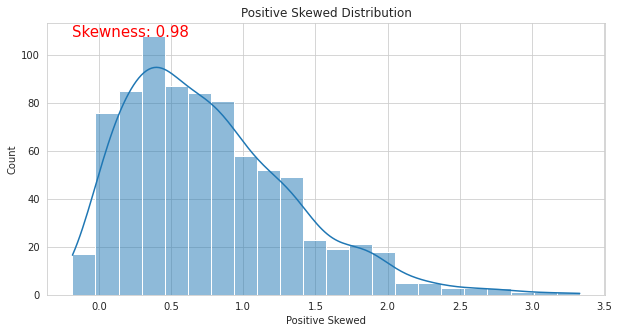

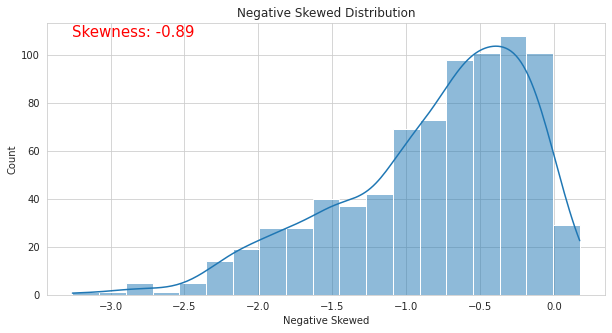

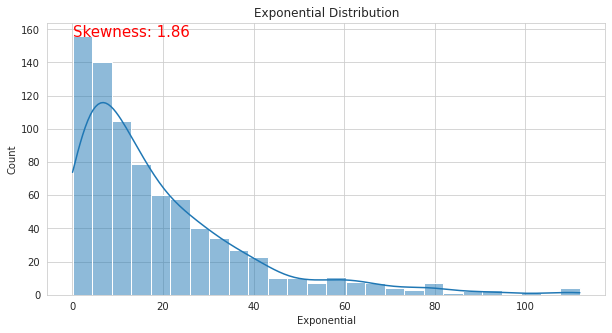

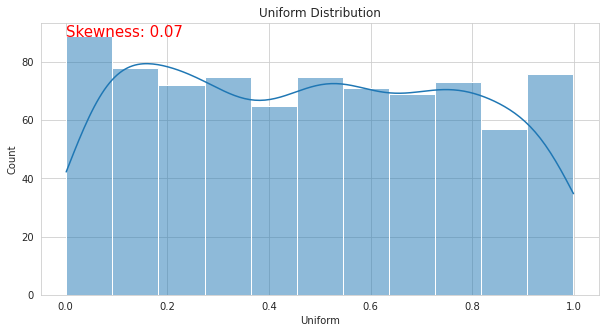

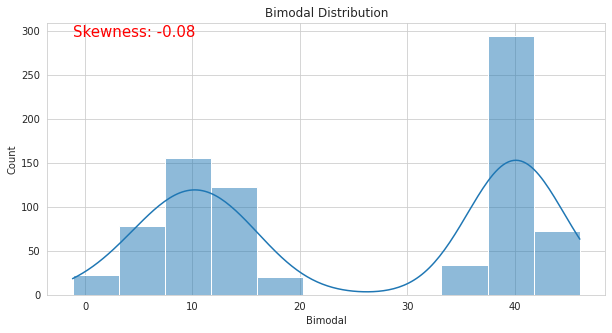

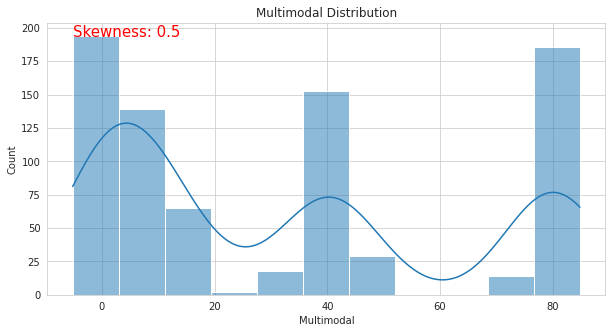

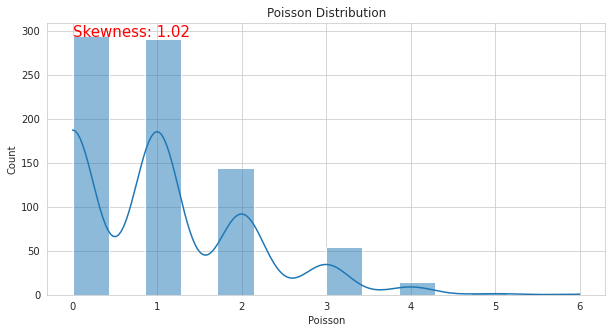

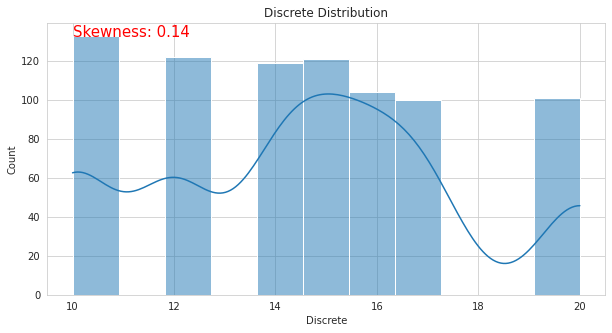

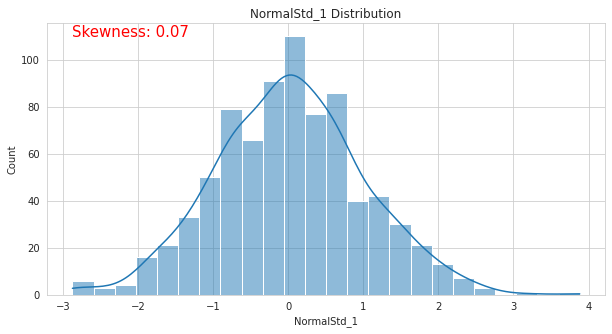

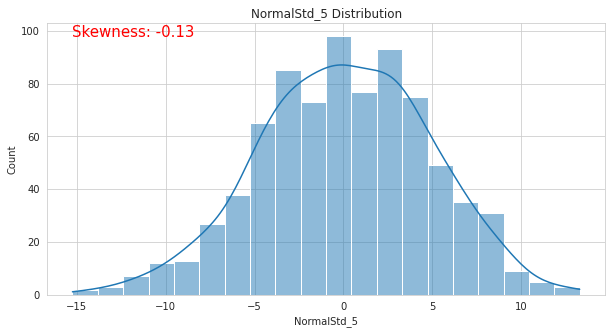

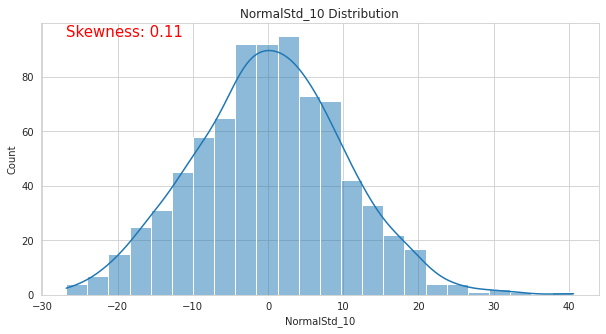

In [13]:
for col in df.columns:
  fig, axes = plt.subplots(figsize=(10,5))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"{col} Distribution")
  plt.text(x=df[col].min(), y=axes.get_ylim()[1] * 0.95, s=f"Skewness: {df[col].skew().round(2)}", fontsize=15, c='r')
  plt.show()
  print("\n")

In [14]:
df.kurtosis()

Normal            -0.134462
Positive Skewed    1.041101
Negative Skewed    0.283836
Exponential        4.065457
Uniform           -1.230196
Bimodal           -1.830466
Multimodal        -1.282046
Poisson            1.029801
Discrete          -0.747910
NormalStd_1        0.250878
NormalStd_5       -0.118906
NormalStd_10       0.165375
dtype: float64

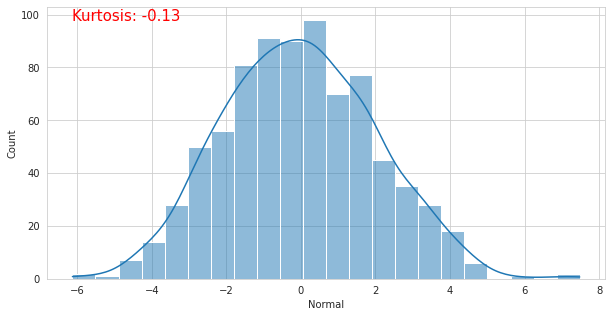

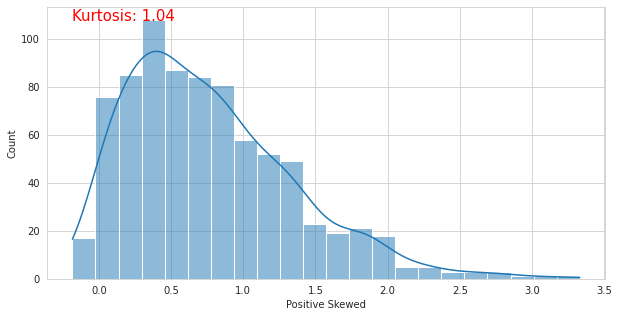

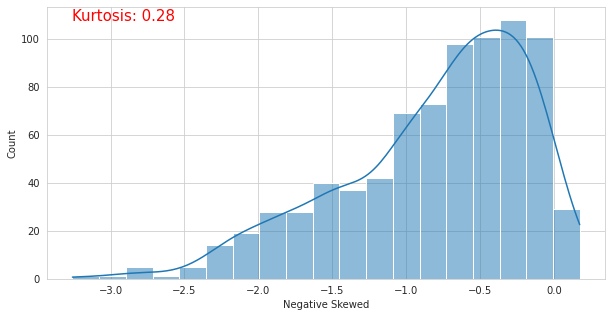

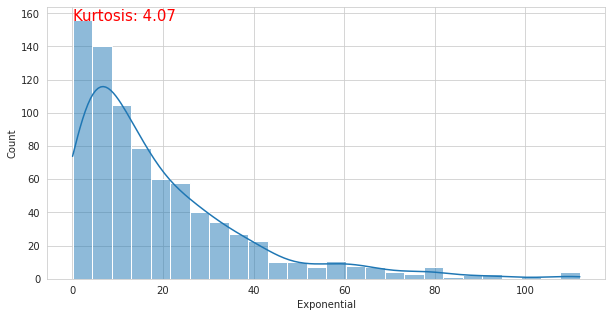

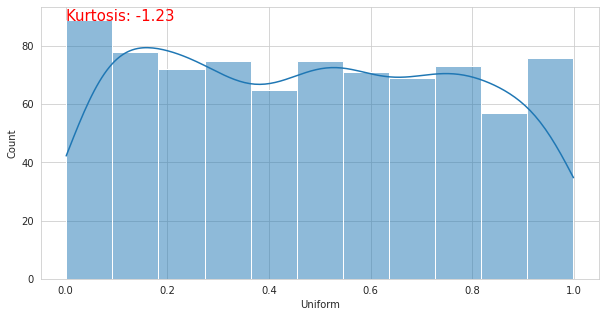

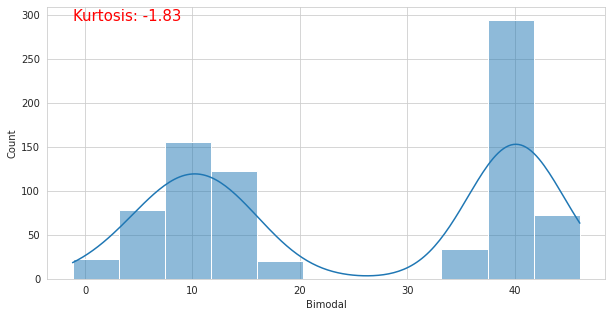

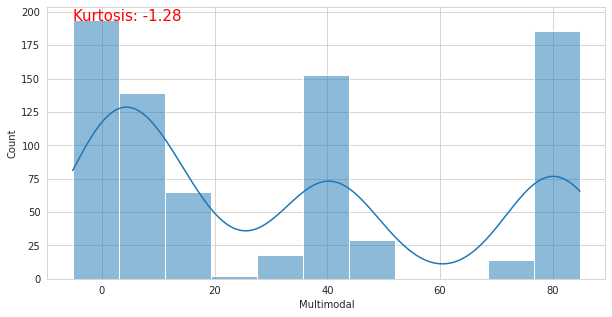

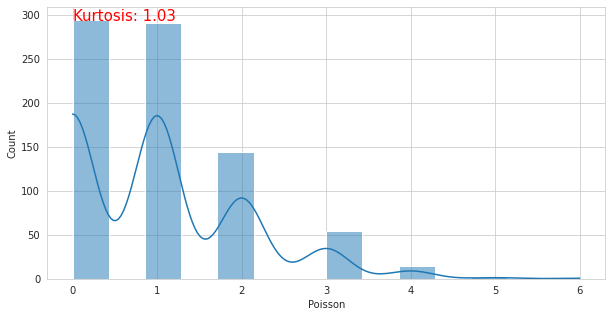

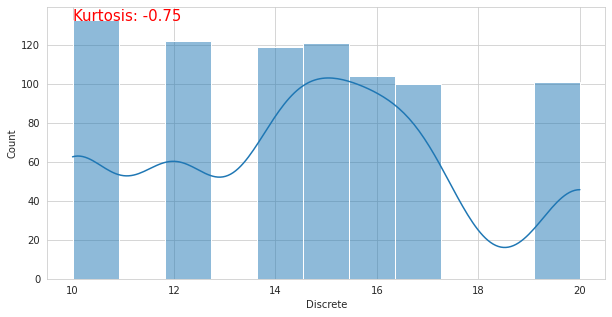

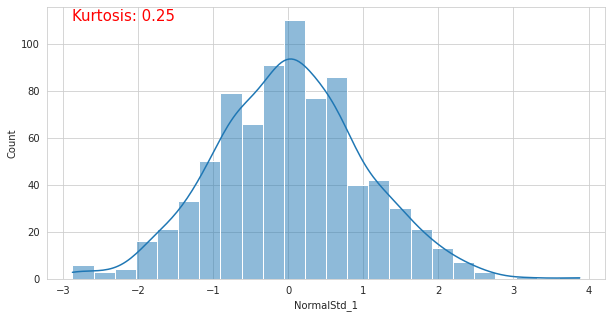

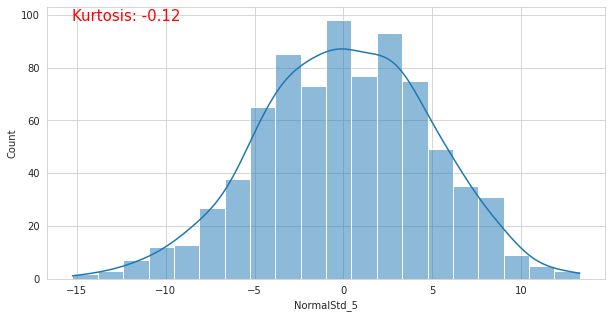

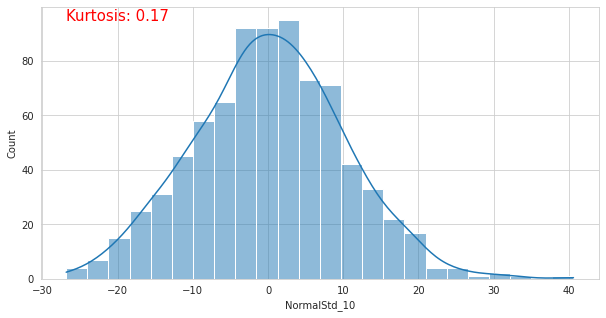

In [15]:
for col in df.columns:
  fig, axes = plt.subplots(figsize=(10,5))
  sns.histplot(data=df, x=col, kde=True)
  plt.text(x=df[col].min(), y=axes.get_ylim()[1] * 0.95, s=f"Kurtosis: {df[col].kurtosis().round(2)}", fontsize=15, c='r')
  plt.show()

In [16]:
df.quantile(q=[0,0.25,0.50,0.75,1])

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete,NormalStd_1,NormalStd_5,NormalStd_10
0.00,-6.12800,-0.18300,-3.2580,0.0390,0.00100,-1.16400,-5.20100,0.0,10.0,-2.874559,-15.249648,-26.837837
0.25,-1.50650,0.32900,-1.1695,5.5970,0.22025,10.01150,3.32525,0.0,12.0,-0.649605,-3.162660,-6.438641
0.50,-0.07600,0.67650,-0.6535,12.9335,0.48450,30.12400,24.02350,1.0,15.0,0.007958,0.097271,0.135175
0.75,1.41975,1.09725,-0.3080,25.9745,0.73500,40.08475,55.71025,2.0,17.0,0.657305,3.468861,6.817045
1.00,7.48000,3.33100,0.1740,112.0070,0.99900,46.06200,84.84900,6.0,20.0,3.882189,13.307091,40.603295


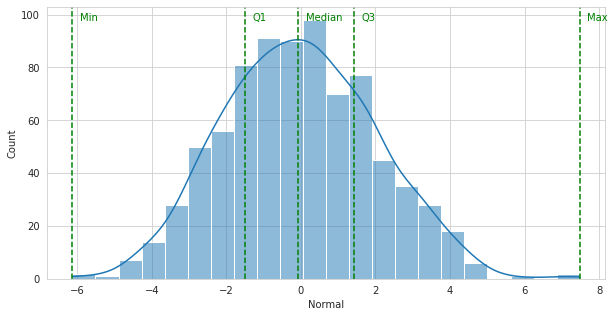

In [17]:
col = 'Normal'
map = pd.Series(data=["Min","Q1","Median","Q3","Max"], index=[0,0.25,0.50,0.75,1])

fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x=col, kde=True)
for quantile in [0, 0.25, 0.5, 0.75, 1]:
  plt.axvline(df[col].quantile(q=quantile), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=quantile) + df[col].std()/10,
           y=axes.get_ylim()[1] * 0.95,
           s=f"{map[quantile]}", fontsize=10, c='g')

plt.show()

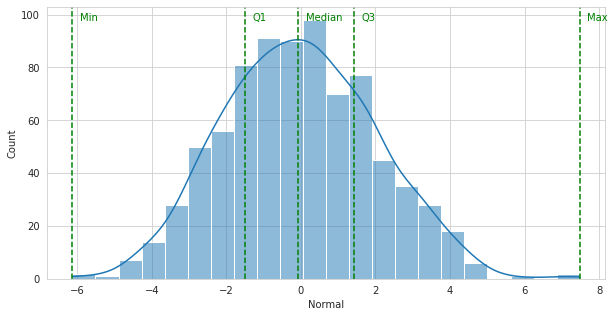

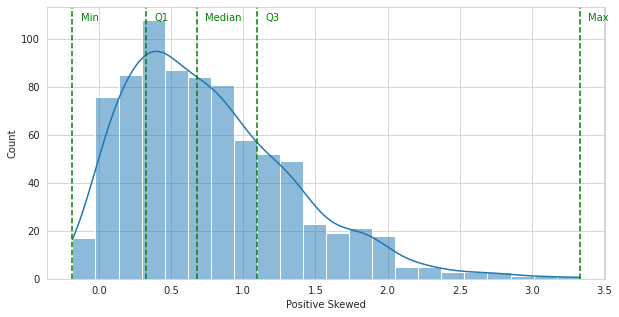

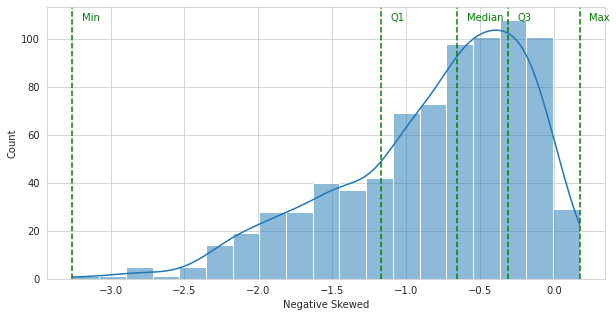

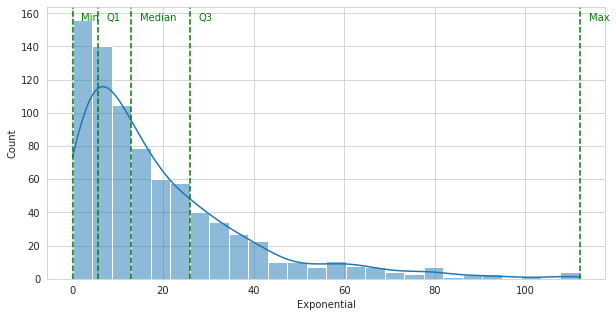

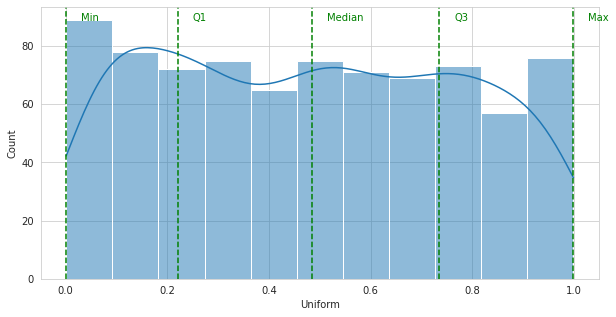

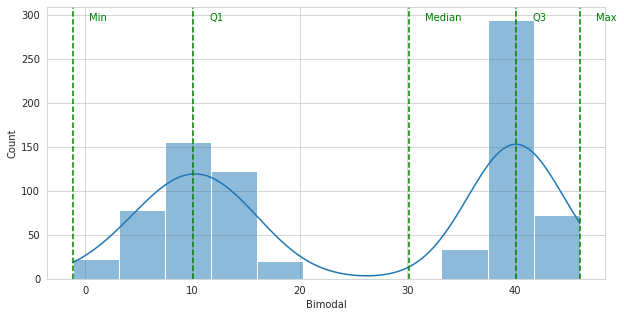

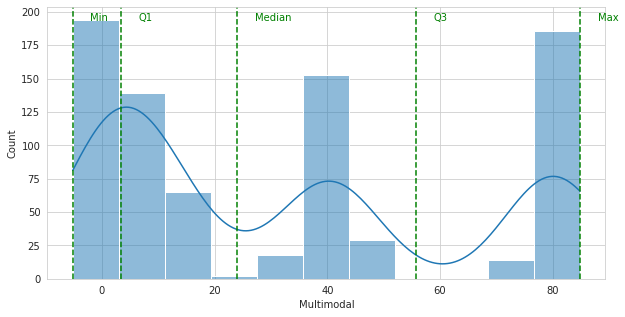

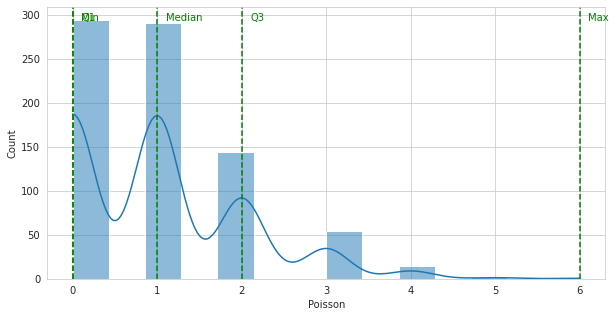

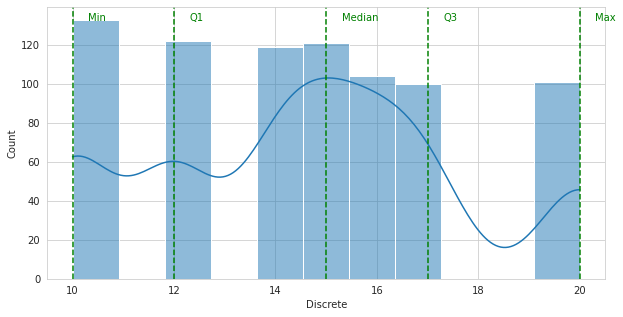

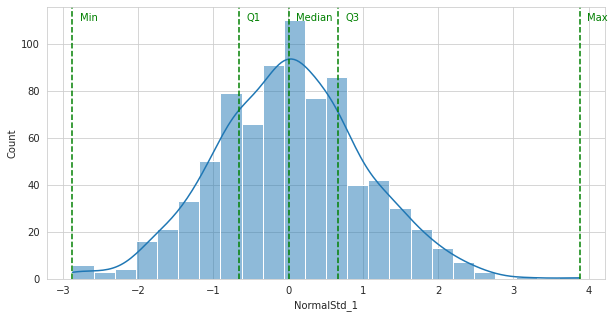

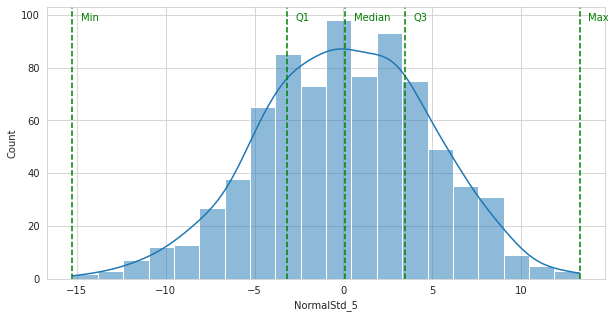

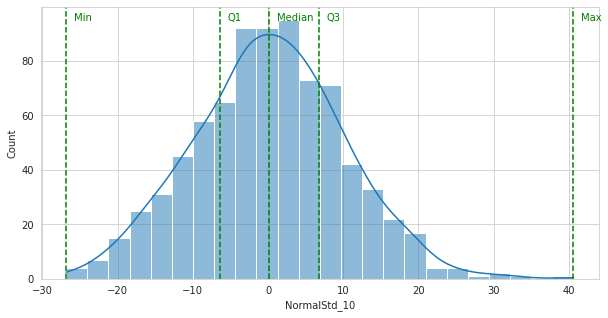

In [18]:
map = pd.Series(data=["Min","Q1","Median","Q3","Max"], index=[0,0.25,0.50,0.75,1])

for col in df.columns:
  fig, axes = plt.subplots(figsize=(10,5))
  sns.histplot(data=df, x=col, kde=True)
  for quantile in [0, 0.25, 0.5, 0.75, 1]:
    plt.axvline(df[col].quantile(q=quantile), color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].quantile(q=quantile) + df[col].std()/10, y=axes.get_ylim()[1] * 0.95, s=f"{map[quantile]}", fontsize=10, c='g')
    

  plt.show()

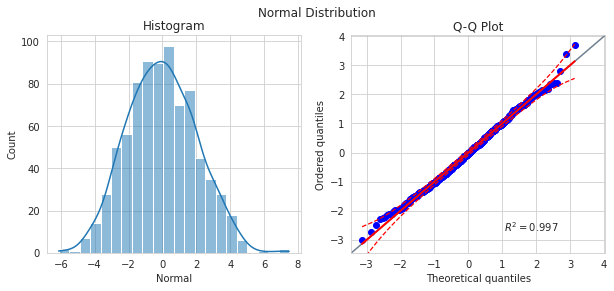

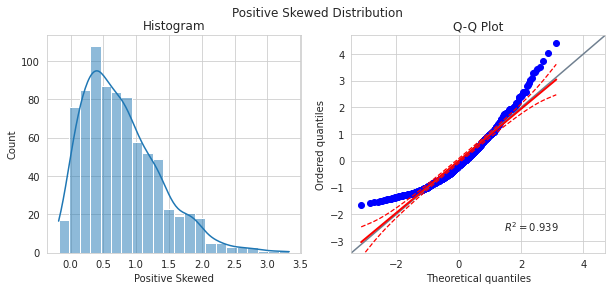

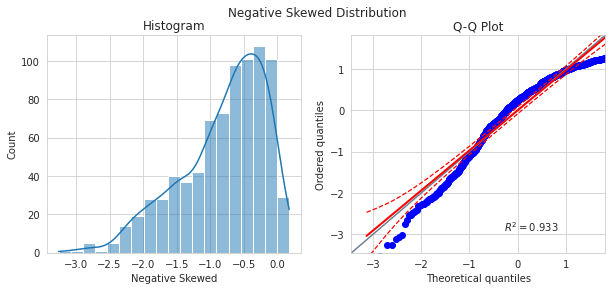

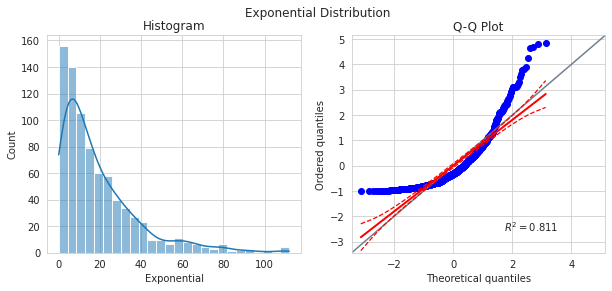

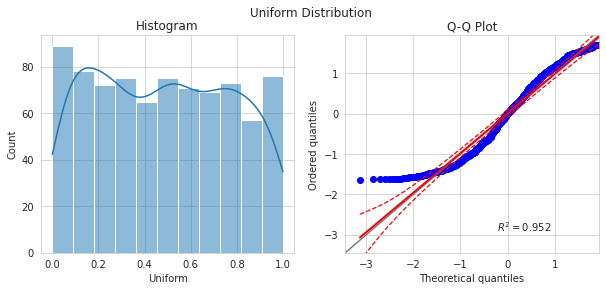

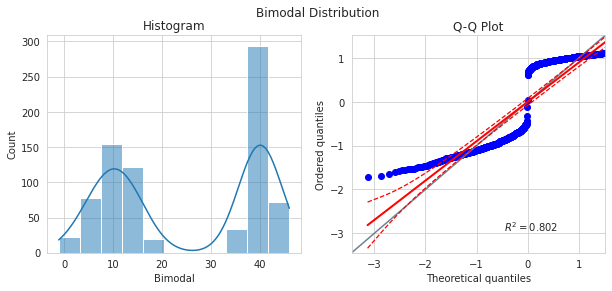

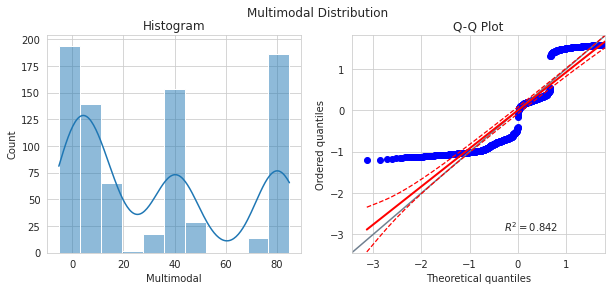

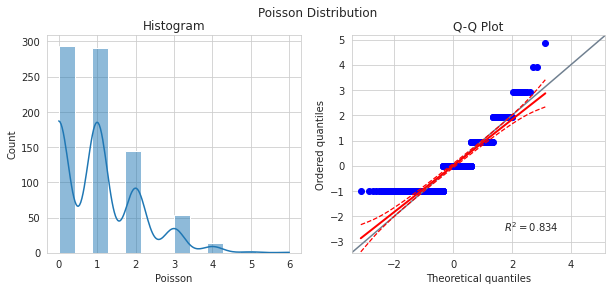

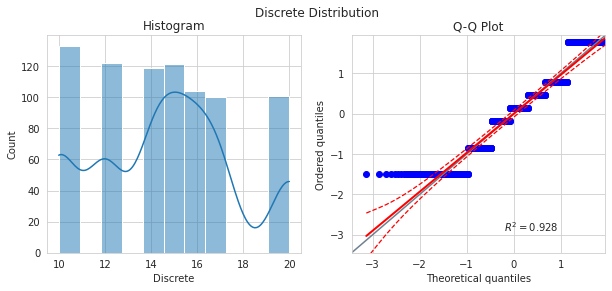

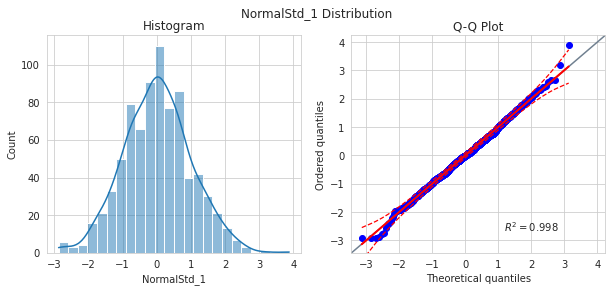

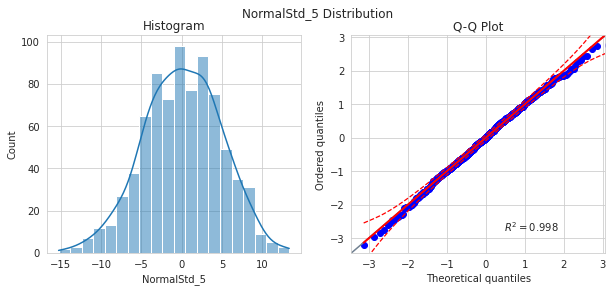

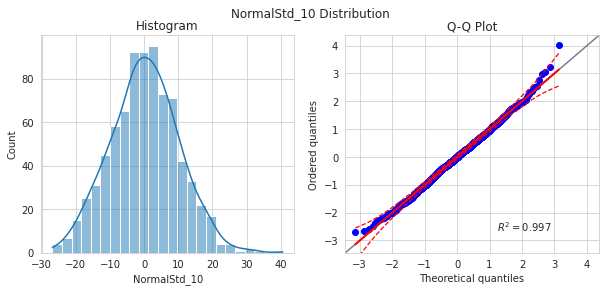

In [19]:
import numpy as np
import pingouin as pg
for col in df.columns:
  fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
  sns.histplot(data=df, x=col, kde=True,ax=axes[0])
  axes[0].set_title("Histogram")
  pg.qqplot(df[col], dist='norm',ax=axes[1])
  fig.suptitle(f"{col} Distribution")
  plt.show()
  print("\n")

In [20]:
df.min()

Normal             -6.128000
Positive Skewed    -0.183000
Negative Skewed    -3.258000
Exponential         0.039000
Uniform             0.001000
Bimodal            -1.164000
Multimodal         -5.201000
Poisson             0.000000
Discrete           10.000000
NormalStd_1        -2.874559
NormalStd_5       -15.249648
NormalStd_10      -26.837837
dtype: float64

In [21]:
df.max()

Normal               7.480000
Positive Skewed      3.331000
Negative Skewed      0.174000
Exponential        112.007000
Uniform              0.999000
Bimodal             46.062000
Multimodal          84.849000
Poisson              6.000000
Discrete            20.000000
NormalStd_1          3.882189
NormalStd_5         13.307091
NormalStd_10        40.603295
dtype: float64

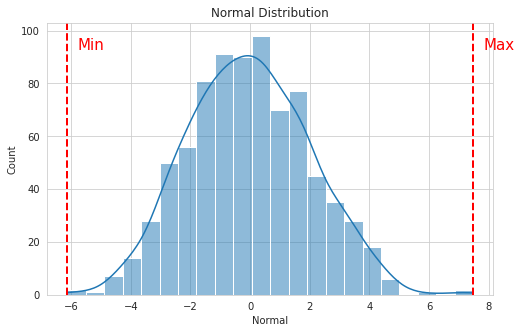

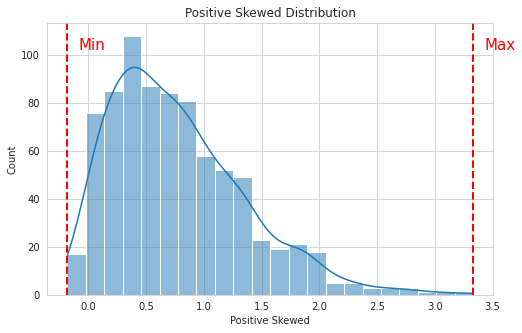

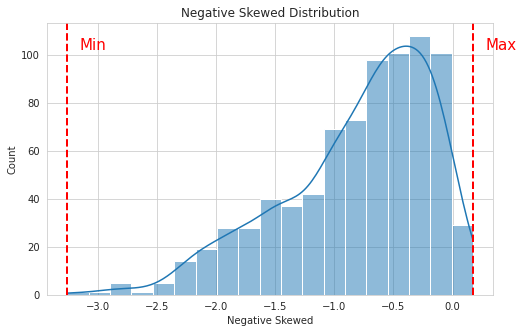

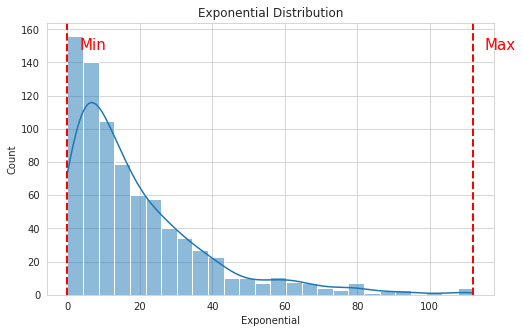

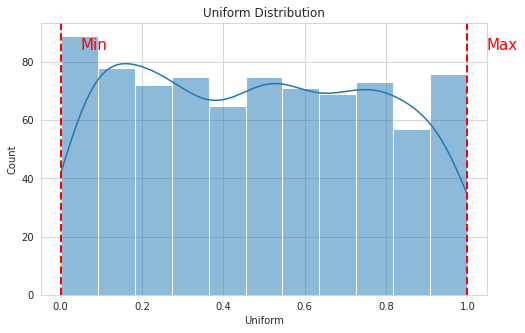

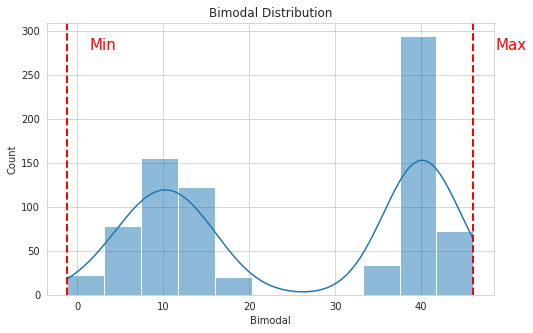

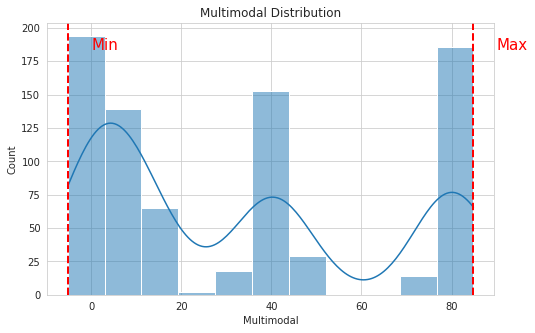

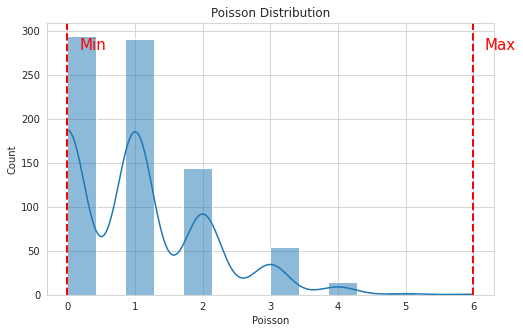

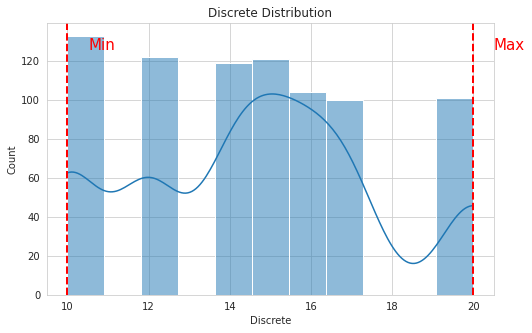

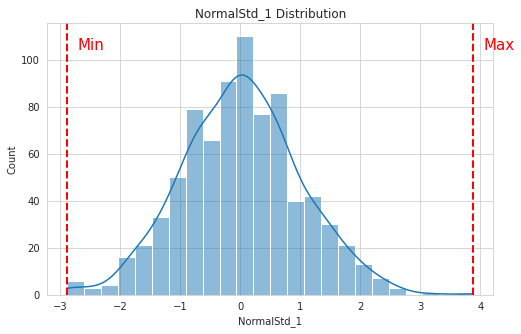

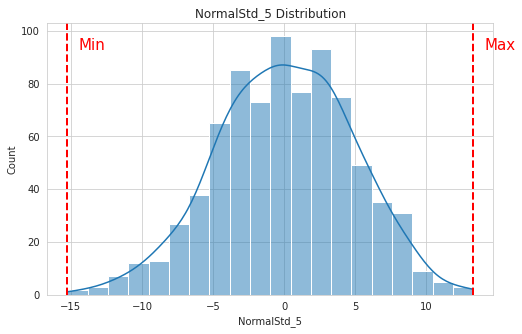

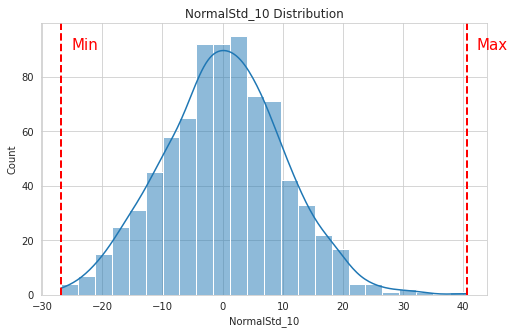

In [22]:
for col in df.columns:
    
  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].min(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].min() + df[col].std()/6 , y=axes.get_ylim()[1] * 0.90, s='Min', fontsize=15, c='r')

  plt.axvline(df[col].max(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].max() + df[col].std()/6 , y=axes.get_ylim()[1] * 0.9, s='Max', fontsize=15, c='r')

  plt.show()
  print("\n")